**It's time to EXPLORE**

# Exploration : Prediction

<font color="Green">  Date: 17-07-2020 - 18-07-2020 KaggleStreak </font>

So, here I start my **Exploration Series**:
 *" It will consists of Data Pre-processing, Data Visualization, EDA, Feature Engg., Model build and finally Evaluation of model. "*

Coming to the present dataset I a using **Campus Recruitment** dataset (link:[https://www.kaggle.com/benroshan/factors-affecting-campus-placement](http://))

This dataset was developed by *Ben Roshan D*

And according to him, *This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students*

So, here I start my first exploration to the saame dataset.

Do give <font color="Red"> UPVOTE </font>



## Data Preprocessing

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Reading the dataset
train_data = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

### Let's have a detailed look over dataset

In [3]:
train_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**So, we have a useless column 'sl_no, let's just drop it first**

In [4]:
train_data = train_data.iloc[:,1:]
train_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
print("Shape of data: ",train_data.shape)

Shape of data:  (215, 14)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
train_data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [8]:
# Looking ate the unique values of Categorical Features
print(train_data['ssc_b'].unique())
print(train_data['hsc_b'].unique())
print(train_data['hsc_s'].unique())
print(train_data['degree_t'].unique())
print(train_data['workex'].unique())
print(train_data['specialisation'].unique())
print(train_data['status'].unique())

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [9]:
train_data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We have 67 null values in *salary* column, so I had made a separate dataframe for not null values in all columns for Exploration of data.

In [10]:
null_salary_data = train_data[train_data['salary'].notna()]
null_salary_data = null_salary_data.reset_index(drop = True)

## Data Visualization
### Let's have some Plots for a user-friendly look over data

### 1) Salary

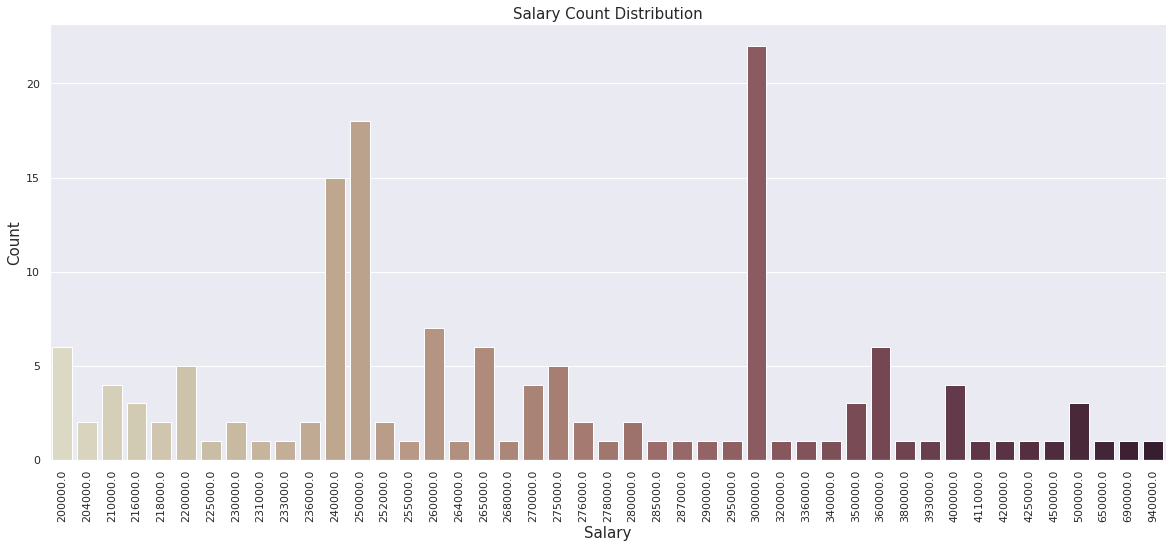

In [11]:
var = 'salary'
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
plt.xticks(rotation=90);
sns.countplot(x = var,palette="ch:.4", data = null_salary_data)
ax.set_xlabel('Salary', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Salary Count Distribution', fontsize=15)
sns.despine()

### 2) Status

In [12]:
print(train_data['status'].value_counts())

Placed        148
Not Placed     67
Name: status, dtype: int64


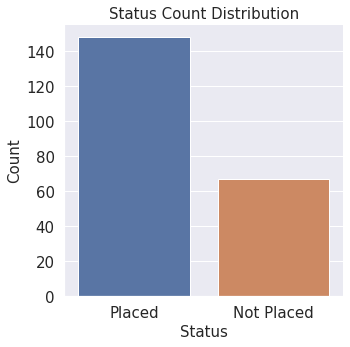

In [13]:
var = 'status'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x = var, data = train_data)
ax.set_xlabel('Status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Not placed data are less than half of Placed one.

### 3) Senior Secondary Board

In [14]:
print('Senior Secondary Board: ',train_data['ssc_b'].unique())

Senior Secondary Board:  ['Others' 'Central']


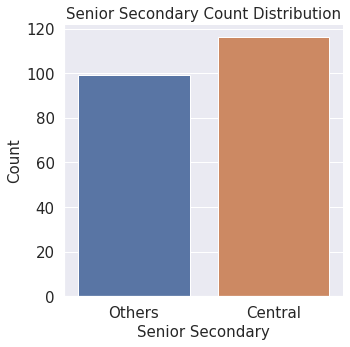

In [15]:
var = 'ssc_b'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x = var, data = train_data)
ax.set_xlabel('Senior Secondary', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Senior Secondary Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 4) Higher Secondary Boards

In [16]:
print('Higher Secondary Boards: ',train_data['hsc_b'].unique())

Higher Secondary Boards:  ['Others' 'Central']


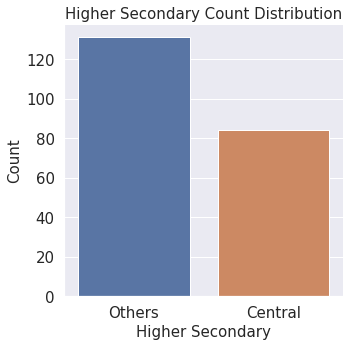

In [17]:
var = 'hsc_b'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x = var, data = train_data)
ax.set_xlabel('Higher Secondary', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Higher Secondary Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 5) Higher Secondary Subjects

In [18]:
print('Higher Secondary Subjects: ',train_data['hsc_s'].unique())

Higher Secondary Subjects:  ['Commerce' 'Science' 'Arts']


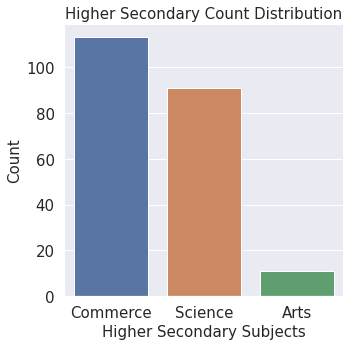

In [19]:
var = 'hsc_s'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x = var, data = train_data)
ax.set_xlabel('Higher Secondary Subjects', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Higher Secondary Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

*Commerce* is the most popular Subjects in dataset followed by *Science*. But, *Arts* is having a very low popularity when compared to other ones

### 6) Work experience

In [20]:
print('Work Experience: ',train_data['workex'].unique())

Work Experience:  ['No' 'Yes']


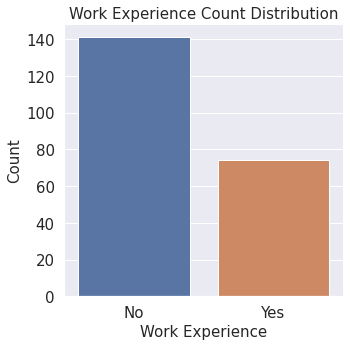

In [21]:
var = 'workex'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x = var, data = train_data)
ax.set_xlabel('Work Experience', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Work Experience Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 7) Specialisation

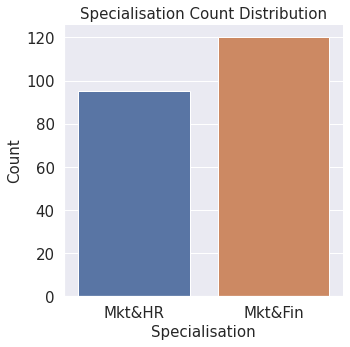

In [22]:
var = 'specialisation'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x = var, data = train_data)
ax.set_xlabel('Specialisation', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Specialisation Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


**Now after having some Count Visualization let's visualize some related one**

### First I started with 'Senior Secondary Board Salary On basis of Gender'

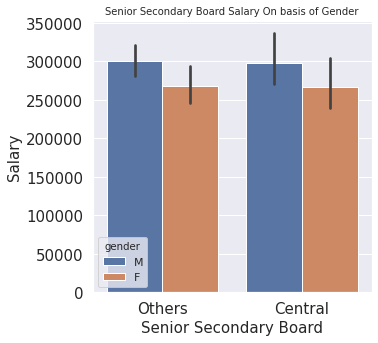

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.barplot(x='ssc_b', y='salary',hue='gender', data=train_data)
ax.set_xlabel('Senior Secondary Board', fontsize=15)
ax.set_ylabel('Salary', fontsize=15)
ax.set_title('Senior Secondary Board Salary On basis of Gender', fontsize=10)
ax.tick_params(labelsize=15)
plt.show() 

**As our target feature is *Status*, So let's compare other features w.r.t. status**

### Status vs feature count

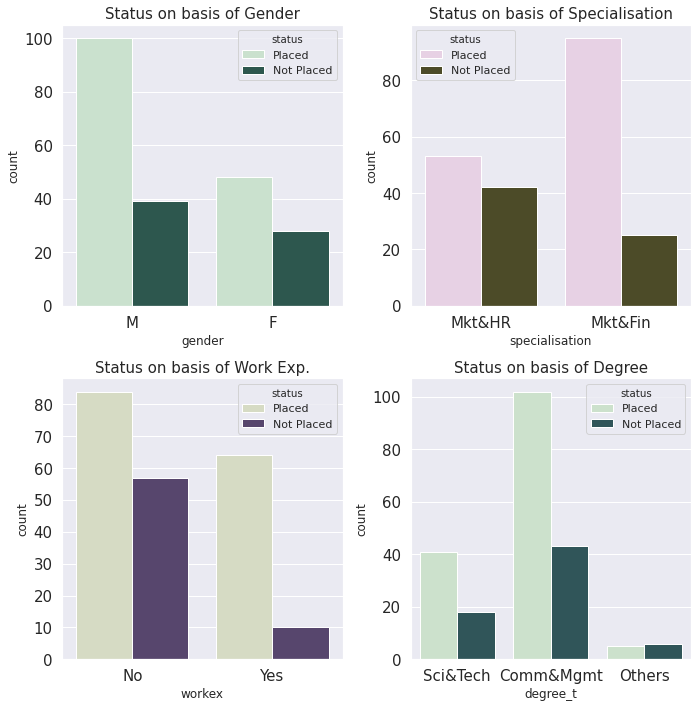

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

sns.countplot(x = 'gender', hue = 'status', palette="ch:2.5,-.2,dark=.3",data = train_data, ax = ax1)
ax1.set_title('Status on basis of Gender', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'specialisation', hue = 'status', palette="ch:5,-.6,dark=.3", data = train_data, ax = ax2)
ax2.set_title('Status on basis of Specialisation', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'workex', hue = 'status', palette="ch:10.5,-8.2,dark=.3", data = train_data, ax = ax3)
ax3.set_title('Status on basis of Work Exp.', fontsize=15)
ax3.tick_params(labelsize=15)

sns.countplot(x = 'degree_t', hue = 'status', palette="ch:12.5,-11.2,dark=.3", data = train_data, ax = ax4)
ax4.set_title('Status on basis of Degree', fontsize=15)
ax4.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## Working with Categorical Data

As discussed in many earlier notebooks, we have 2 popular ways to handle Categorical data:
1. OneHotEncoder
2. LabelEncoder

### First we will start with Gender 
**We will be applying One-hot Encding here**

In [25]:
Gender = train_data[['gender']]
Gender = pd.get_dummies(Gender,drop_first=True)
Gender.head()

,gender_M
0,1
1,1
2,1
3,1
4,1


Followed we are modifing all others columns

In [26]:
ssc_b = train_data[['ssc_b']]
ssc_b = pd.get_dummies(ssc_b,drop_first=True)
hsc_b = train_data[['hsc_b']]
hsc_b = pd.get_dummies(hsc_b,drop_first=True)
hsc_s = train_data[['hsc_s']]
hsc_s = pd.get_dummies(hsc_s,drop_first=True)
degree_t = train_data[['degree_t']]
degree_t = pd.get_dummies(degree_t,drop_first=True)
workex = train_data[['workex']]
workex = pd.get_dummies(workex,drop_first=True)
specialisation = train_data[['specialisation']]
specialisation = pd.get_dummies(specialisation,drop_first=True)

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**For Status Column I am using Label Encoding, as we need only one column for Y(target feature)**

In [28]:
train_data.replace({"Placed":1,"Not Placed":0},inplace=True)
train_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


I will be droping *salary* column as it has a large null values when compared to whole size of data.

In [29]:
train_data.drop(["salary"],axis=1,inplace=True)

**And, then we will add up all One-Hot Encoded DF to final one, followed by droping the useless.**

In [30]:
final_train= pd.concat([train_data,Gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation],axis=1)
final_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,status,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,...,1,1,1,1,1,0,0,1,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,...,1,1,0,1,0,1,0,1,1,0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,...,1,1,0,0,0,0,0,0,0,0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,...,0,1,0,0,0,1,0,1,0,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,...,1,1,0,0,1,0,0,0,0,0


In [31]:
final_train.drop(["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation"],axis=1,inplace=True)
final_train.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,1,0,0,0,0,0


In [32]:
print("Final Shape of data: ",final_train.shape)
print("\nFinal Columns of data:\n",final_train.columns)

Final Shape of data:  (215, 15)

Final Columns of data:
 Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')


## Preparation of final data 
### and checking for any other Useless Features (here Heat Map will help us)

In [33]:
X = final_train.loc[:,['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']]
y = final_train.loc[:,['status']]

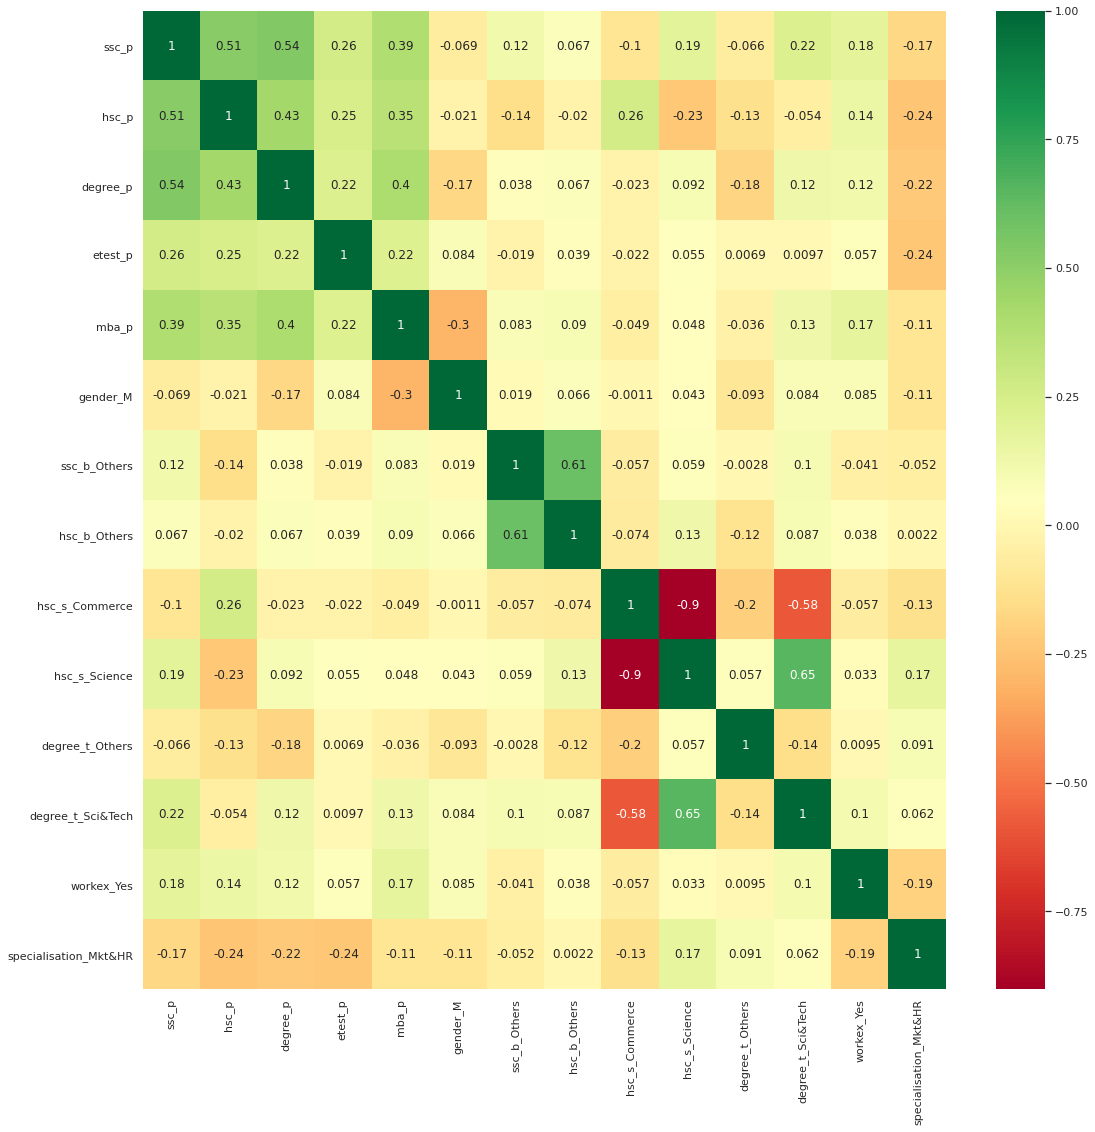

In [34]:
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Build it (Model)

First we are spliting the data to train and test for the model

**We will using following 3 models for our dataset:**
1. Logistic Regression
2. XGB Classifier
3. GradientBoosting Classifier

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 25)

### 1) Logistic Regression

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
log_reg = LogisticRegression() 
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


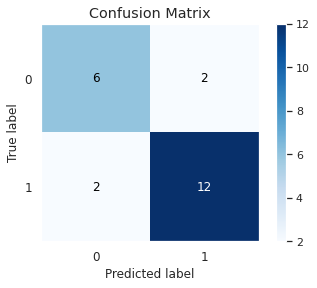

In [37]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,log_pred)

In [38]:
from sklearn import metrics
print("Logistic Model Accuracy is: ",metrics.accuracy_score(y_test, log_pred))

Logistic Model Accuracy is:  0.8181818181818182


### 3) XGB Classifier

XGBClassifier Accuracy is:  0.8636363636363636


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


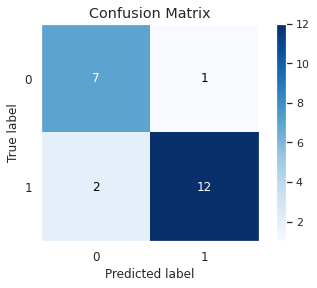

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBClassifier Accuracy is: ",metrics.accuracy_score(y_test, xgb_pred))
skplt.metrics.plot_confusion_matrix(y_test,xgb_pred)

### 3) Gradient-Boosting Classifier

GradientBoostingClassifier Accuracy is:  0.9090909090909091


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


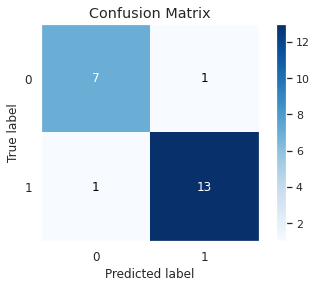

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbk_pred = gbk.predict(X_test)

print("GradientBoostingClassifier Accuracy is: ",metrics.accuracy_score(y_test, gbk_pred))
skplt.metrics.plot_confusion_matrix(y_test,gbk_pred)

#### ROC of XGB and GradientBoost

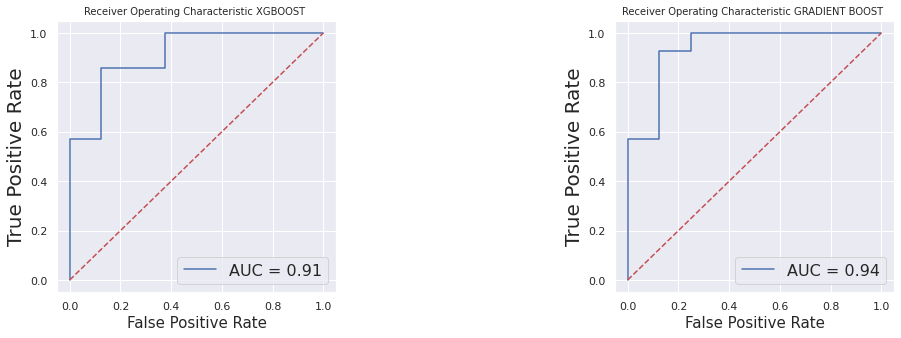

In [41]:
from sklearn import metrics

fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


**DO look My Classification Model Evaluation for more evaluation works :**

[https://www.kaggle.com/iabhishekmaurya/classification-model-evaluation](http://)

 So, Finally this NoteBook End here 🤵🏻
 
 One could go even further by using more different models to try upon this data. But, for now I left it  over you all
 
 Before going a humble request if you liked the notebook the 
 <font color="Red">Please Upvote ( It motivates me ) </font>
 
 And Stay Tuned... 
 
 Till then Happy Coding
 